## Tony Nunn <br>
## ME555 Robot Learning <br>
## Visualizations

In [4]:
#imports
import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import scipy.io
import os

### EMG vs. Stimulus Labels

In [6]:
from data_loader import LoadAndProcess


PROJECT_ROOT = Path(os.getcwd()).resolve().parents[0]
sys.path.append(str(PROJECT_ROOT / "src"))


DATA_PATH = PROJECT_ROOT / "data" / "ninapro" / "DB1" / "S1"
SINGLE_FILE = DATA_PATH / "S1_A1_E2.mat"  # E2 = grasping primitives

WINDOW_SIZE = 50
OVERLAP_SIZE = 25

# Use your existing loader to get features and labels
X, y = LoadAndProcess(str(SINGLE_FILE), WINDOW_SIZE, OVERLAP_SIZE)

print(f"Loaded Features: {X.shape}")
print(f"Loaded Labels: {y.shape}")
print("Unique gesture labels:", np.unique(y))


Processing file: S1_A1_E2.mat...

Successfully processed 1 file(s).
Final Dataset Shape: Features (X)=(5718, 10), Labels (y)=(5718,)
Loaded Features: (5718, 10)
Loaded Labels: (5718,)
Unique gesture labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


#### MAV Features vs. Time

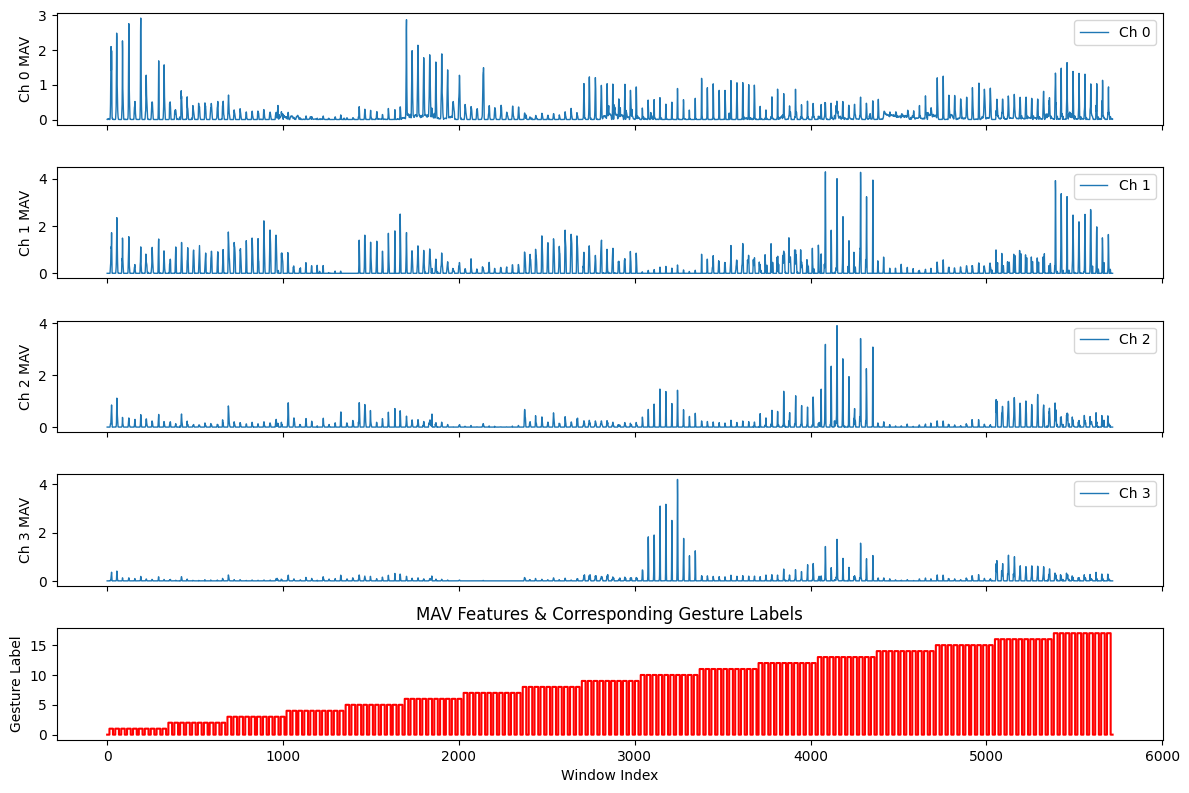

In [7]:
channels_to_plot = [0, 1, 2, 3]  # pick a few EMG channels

fig, axs = plt.subplots(len(channels_to_plot) + 1, 1, figsize=(12, 8), sharex=True)

# Plot MAV features per channel
for i, ch in enumerate(channels_to_plot):
    axs[i].plot(X[:, ch], label=f'Ch {ch}', linewidth=1)
    axs[i].set_ylabel(f'Ch {ch} MAV')
    axs[i].legend(loc='upper right')

# Plot gesture labels as red step plot
axs[-1].step(np.arange(len(y)), y, where='post', color='red', linewidth=1.5)
axs[-1].set_ylabel("Gesture Label")
axs[-1].set_xlabel("Window Index")
axs[-1].set_title("MAV Features & Corresponding Gesture Labels")

plt.tight_layout()
plt.show()


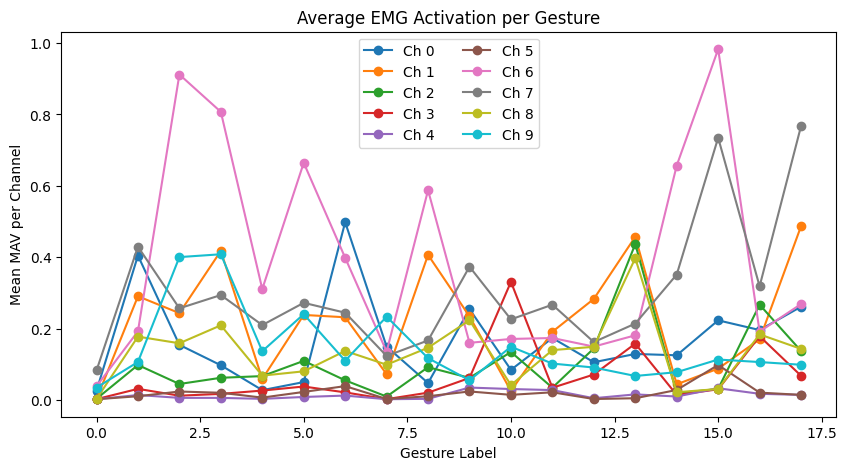

In [8]:
unique_labels = np.unique(y)
mean_mav_per_label = []

for lbl in unique_labels:
    mean_mav_per_label.append(X[y == lbl].mean(axis=0))

mean_mav_per_label = np.array(mean_mav_per_label)

plt.figure(figsize=(10, 5))
for ch in range(X.shape[1]):
    plt.plot(unique_labels, mean_mav_per_label[:, ch], marker='o', label=f'Ch {ch}')
plt.xlabel("Gesture Label")
plt.ylabel("Mean MAV per Channel")
plt.title("Average EMG Activation per Gesture")
plt.legend(ncol=2)
plt.show()


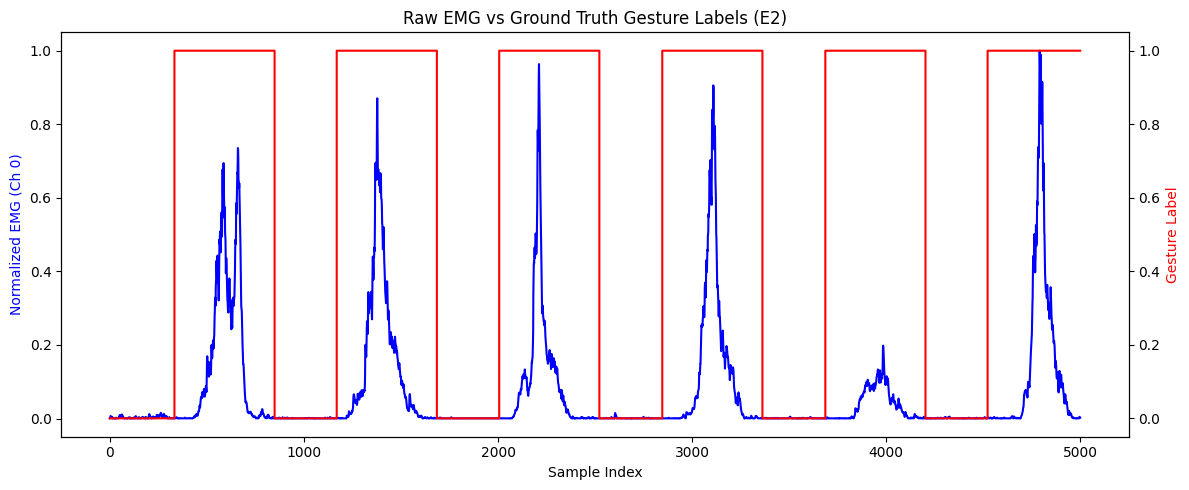

In [9]:
import scipy.io

mat = scipy.io.loadmat(SINGLE_FILE)
emg = mat["emg"]
stimulus = mat["stimulus"].flatten()

# Plot a subset for clarity
start, end = 0, 5000
time = np.arange(start, end)

fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.plot(time, emg[start:end, 0] / np.max(np.abs(emg[start:end, 0])), color='blue', label='EMG (Ch 0)')
ax1.set_ylabel("Normalized EMG (Ch 0)", color='blue')
ax1.set_xlabel("Sample Index")

ax2 = ax1.twinx()
ax2.step(time, stimulus[start:end], where='post', color='red', label='Gesture Label')
ax2.set_ylabel("Gesture Label", color='red')

plt.title("Raw EMG vs Ground Truth Gesture Labels (E2)")
plt.tight_layout()
plt.show()
